___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part - 2<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Time Series Generator)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

In [2]:
df = pd.read_csv('energydata_complete.csv',index_col='date', parse_dates = True)

In [3]:
df.head()
# index, 10'ar dakikalık aralıklarla ilerliyor

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


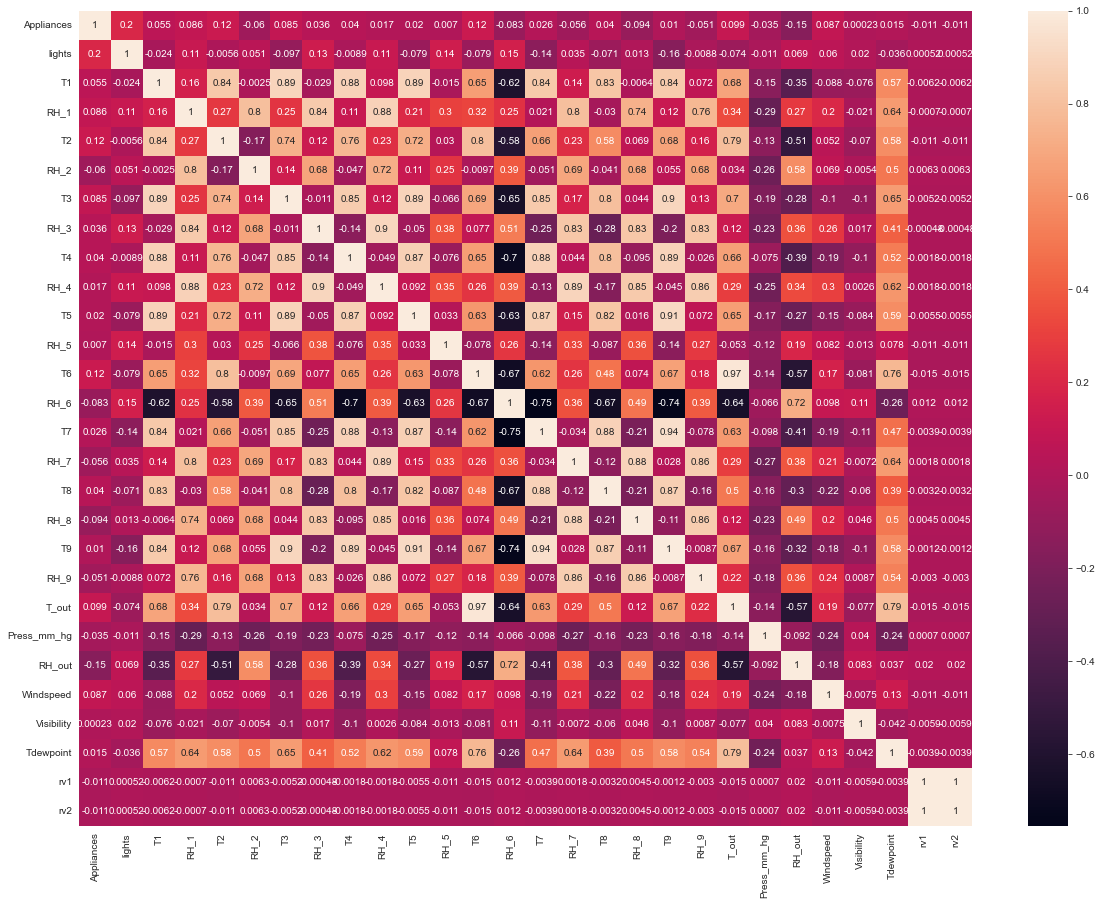

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [7]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [9]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [ ]:
# index aralıkları 10'ar dakikalık, bu sebeple bir gün için düşünürsek toplam sequence uzunluğu 24*6=144 olacak
# sequence uzunluğunu kısaltmak için verileri saatlik değerlere dönüştüreceğiz
# eğitim amaçlı olduğu için kısalttık; 10 dakikalık verilerin tahmini istenseydi değiştirmeyecektik

In [11]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [12]:
df_a = df_a.resample("H").sum()
df_b = df_b.resample("H").mean()  # sıcaklık, nem vb. değerler olduğu için toplamını almak mantıklı olmazdı, bu sebeple
                                  # ortalamalarını aldık
    
# bunu kullanabilmek için index'in datetime formatında olması gerekir

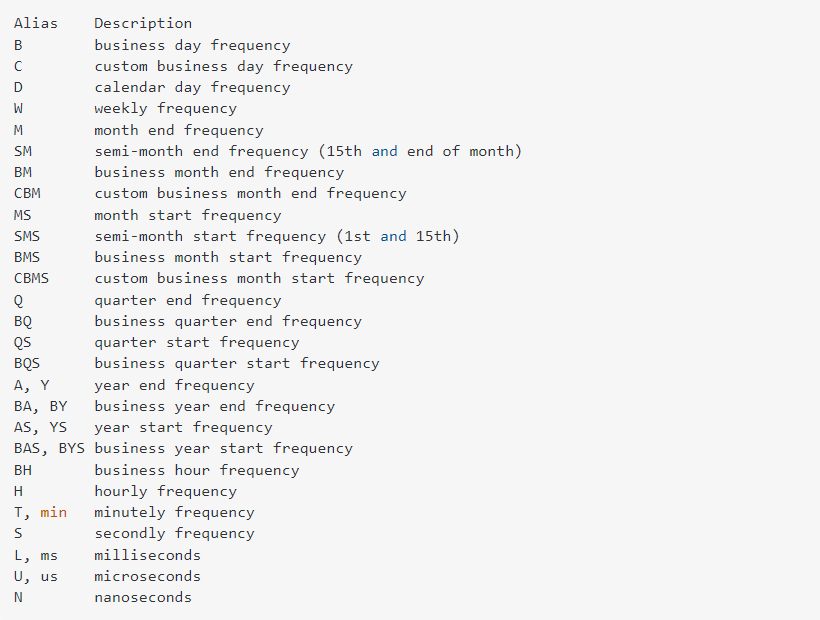

In [13]:
df = pd.concat([df_a, df_b], axis =1)
df.head()
# artık saatlik veriler var elimizde

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [14]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [15]:
df = df.round(2)

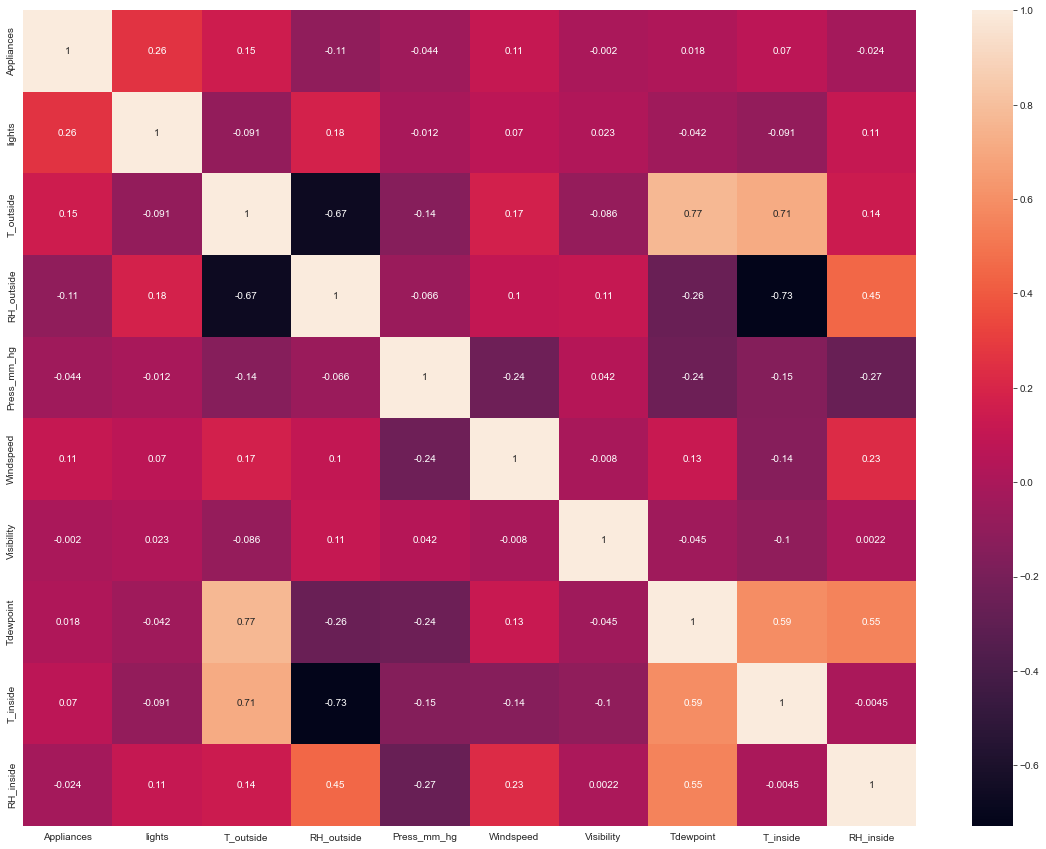

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

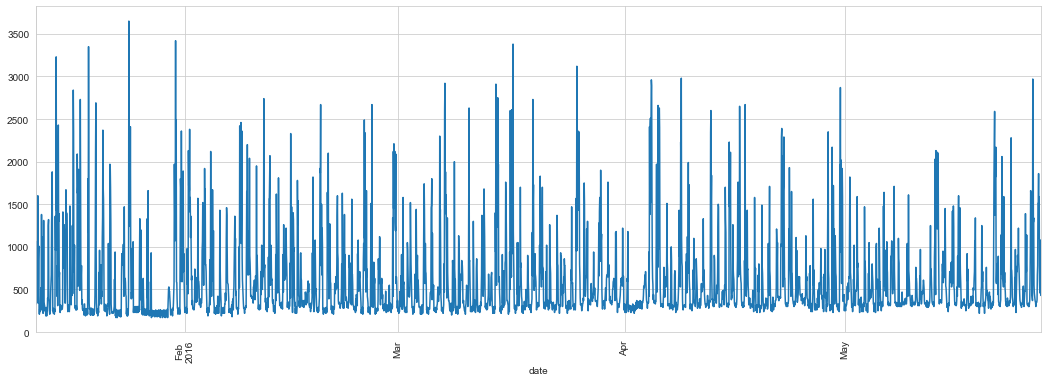

In [17]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

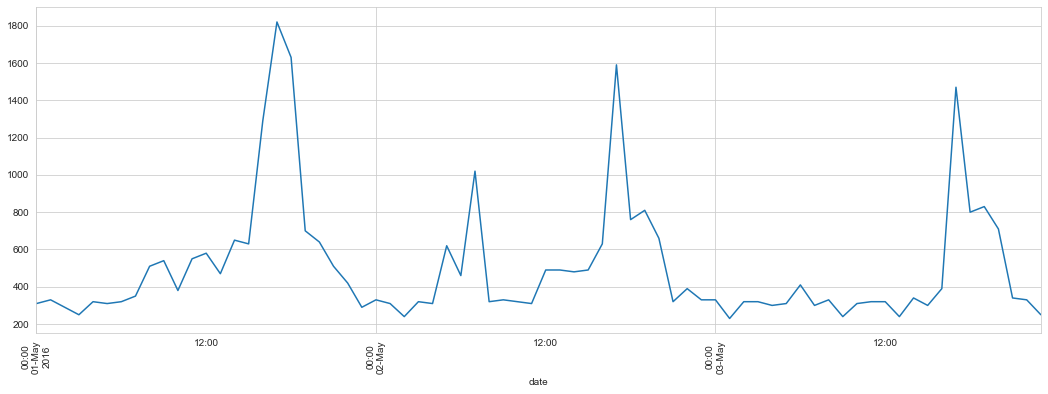

In [18]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);  # örnek olarak üç günlük verileri kontrol ediyoruz
# aslında haftalık, 10 günlük vb. periyotlarda tekrarlar olmuş mu, kontrol etmemiz gerekir

### Train Test Split

In [19]:
len(df)

3290

In [20]:
# How many rows per day?
24

24

In [21]:
test_days = 7

In [22]:
test_ind = test_days*24

In [23]:
test_ind

168

In [24]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [25]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [31]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [32]:
n_features = train_scaled.shape[1]  # 10

In [33]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))  # her feature için veri üretilecek (ileriye doğru tahmin yapılacak)
                              # bu durum 'TimeseriesGenerator' dan kaynaklanıyor
                              # gerçek hayat verilerinde çoklu feature olduğunda 'TimeseriesGenerator' ile iyi sonuç alınamıyor

model.compile(optimizer='adam', loss='mse')

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [35]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 38s 11ms/step - loss: 0.0091 - val_loss: 0.0049
Epoch 2/10
3098/3098 [==============================] - 35s 11ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 3/10
3098/3098 [==============================] - 34s 11ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/10
3098/3098 [==============================] - 34s 11ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 5/10
3098/3098 [==============================] - 39s 13ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/10
3098/3098 [==============================] - 41s 13ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 7/10
3098/3098 [==============================] - 35s 11ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 8/10
3098/3098 [==============================] - 37s 12ms/step - loss: 0.0039 - val_loss: 0.0042


<AxesSubplot:>

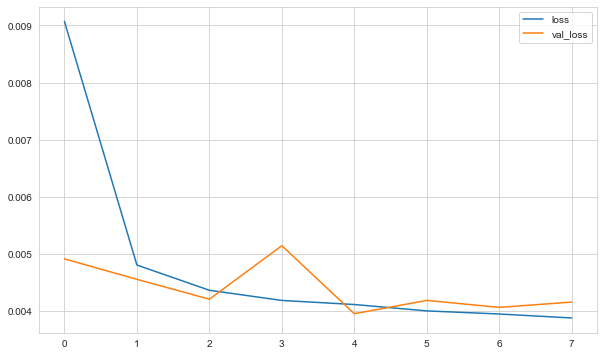

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [39]:
train_scaled

array([[0.04597701, 0.67741935, 0.36747872, ..., 0.53060285, 0.24072217,
        0.72111369],
       [0.25574713, 1.        , 0.35544467, ..., 0.51265532, 0.23971916,
        0.71972158],
       [0.25      , 0.48387097, 0.34605225, ..., 0.5002301 , 0.26780341,
        0.81948956],
       ...,
       [0.03448276, 0.        , 0.79189903, ..., 0.86746434, 0.72016048,
        0.65614849],
       [0.08045977, 0.        , 0.78544174, ..., 0.81316153, 0.73420261,
        0.69605568],
       [0.0862069 , 0.03225806, 0.76342824, ..., 0.75977911, 0.75025075,
        0.80510441]])

In [40]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [41]:
predictions_scaled
# 10 feature vardı, her bir feature için sonuç üretilmiş

[array([0.03708067, 0.01998959, 0.71415037, 0.05756663, 0.63322365,
        0.3349433 , 0.578657  , 0.76602924, 0.75900424, 0.7945488 ],
       dtype=float32),
 array([0.01872725, 0.01046977, 0.6883075 , 0.14592192, 0.60709035,
        0.32291946, 0.52639437, 0.79369605, 0.7576814 , 0.76375693],
       dtype=float32),
 array([0.0056009 , 0.00979002, 0.6729653 , 0.22142959, 0.57897395,
        0.3162162 , 0.5122274 , 0.8216183 , 0.75715876, 0.7637259 ],
       dtype=float32),
 array([-0.00425434,  0.00969093,  0.66222215,  0.2854595 ,  0.5476069 ,
         0.30900058,  0.5089706 ,  0.847396  ,  0.7563228 ,  0.7744349 ],
       dtype=float32),
 array([-0.01261078,  0.00845005,  0.65571105,  0.34028503,  0.51559305,
         0.30302882,  0.5105697 ,  0.87073624,  0.7559781 ,  0.7904977 ],
       dtype=float32),
 array([-0.01989229,  0.00562369,  0.65352994,  0.3868063 ,  0.48418227,
         0.29824784,  0.513753  ,  0.891706  ,  0.7564623 ,  0.8093081 ],
       dtype=float32),
 array([-0

In [42]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -14.488424071169698 
mae: 0.14735357533738386 
mse: 0.04079397567965036 
rmse: 0.20197518580174734


## Inverse Transformations and Compare

In [43]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
0,299.041,6.197,18.401,6.693,756.533,4.634,38.790,10.166,23.587,48.133
1,235.171,3.246,17.521,15.432,755.412,4.482,35.415,10.767,23.574,47.469
2,189.491,3.035,16.998,22.899,754.206,4.398,34.500,11.374,23.569,47.468
3,155.195,3.004,16.632,29.232,752.861,4.307,34.289,11.934,23.561,47.699
4,126.114,2.620,16.410,34.654,751.489,4.232,34.393,12.441,23.557,48.045
5,100.775,1.743,16.336,39.255,750.142,4.172,34.598,12.897,23.562,48.451
6,80.614,0.526,16.413,43.050,748.843,4.127,34.814,13.310,23.579,48.884
7,67.296,-0.802,16.637,46.046,747.604,4.092,34.996,13.693,23.612,49.330
8,62.090,-2.013,16.997,48.256,746.431,4.068,35.130,14.062,23.666,49.779
9,65.118,-2.947,17.476,49.713,745.334,4.052,35.223,14.428,23.744,50.228


In [44]:
test_new = test[:length]

In [45]:
# her feature için skorları kontrol ediyoruz
for i in test_new.columns:
    print(i)
    eval_metrics(test_new[i], predictions[i])
    print("--"*15)

Appliances
r2_score: -0.8433845315431667 
mae: 738.2093875234326 
mse: 1095553.830139593 
rmse: 1046.687073646939
------------------------------
lights
r2_score: -0.8949975861686577 
mae: 6.030298101250082 
mse: 61.85061565967146 
rmse: 7.864516238121164
------------------------------
T_outside
r2_score: 0.6710525521716053 
mae: 2.502359876682361 
mse: 8.56747322816949 
rmse: 2.927024637438074
------------------------------
RH_outside
r2_score: -0.60177807407008 
mae: 21.255709603441257 
mse: 799.2133491386563 
rmse: 28.27036167329057
------------------------------
Press_mm_hg
r2_score: -79.76506083706589 
mae: 11.738427156607353 
mse: 160.5621608330246 
rmse: 12.671312514219851
------------------------------
Windspeed
r2_score: -0.007085280337931099 
mae: 1.4932287430018185 
mse: 3.548531949448195 
rmse: 1.88375474769095
------------------------------
Visibility
r2_score: 0.022738356866073395 
mae: 5.174566428512333 
mse: 34.38616417721062 
rmse: 5.863971706719825
--------------------

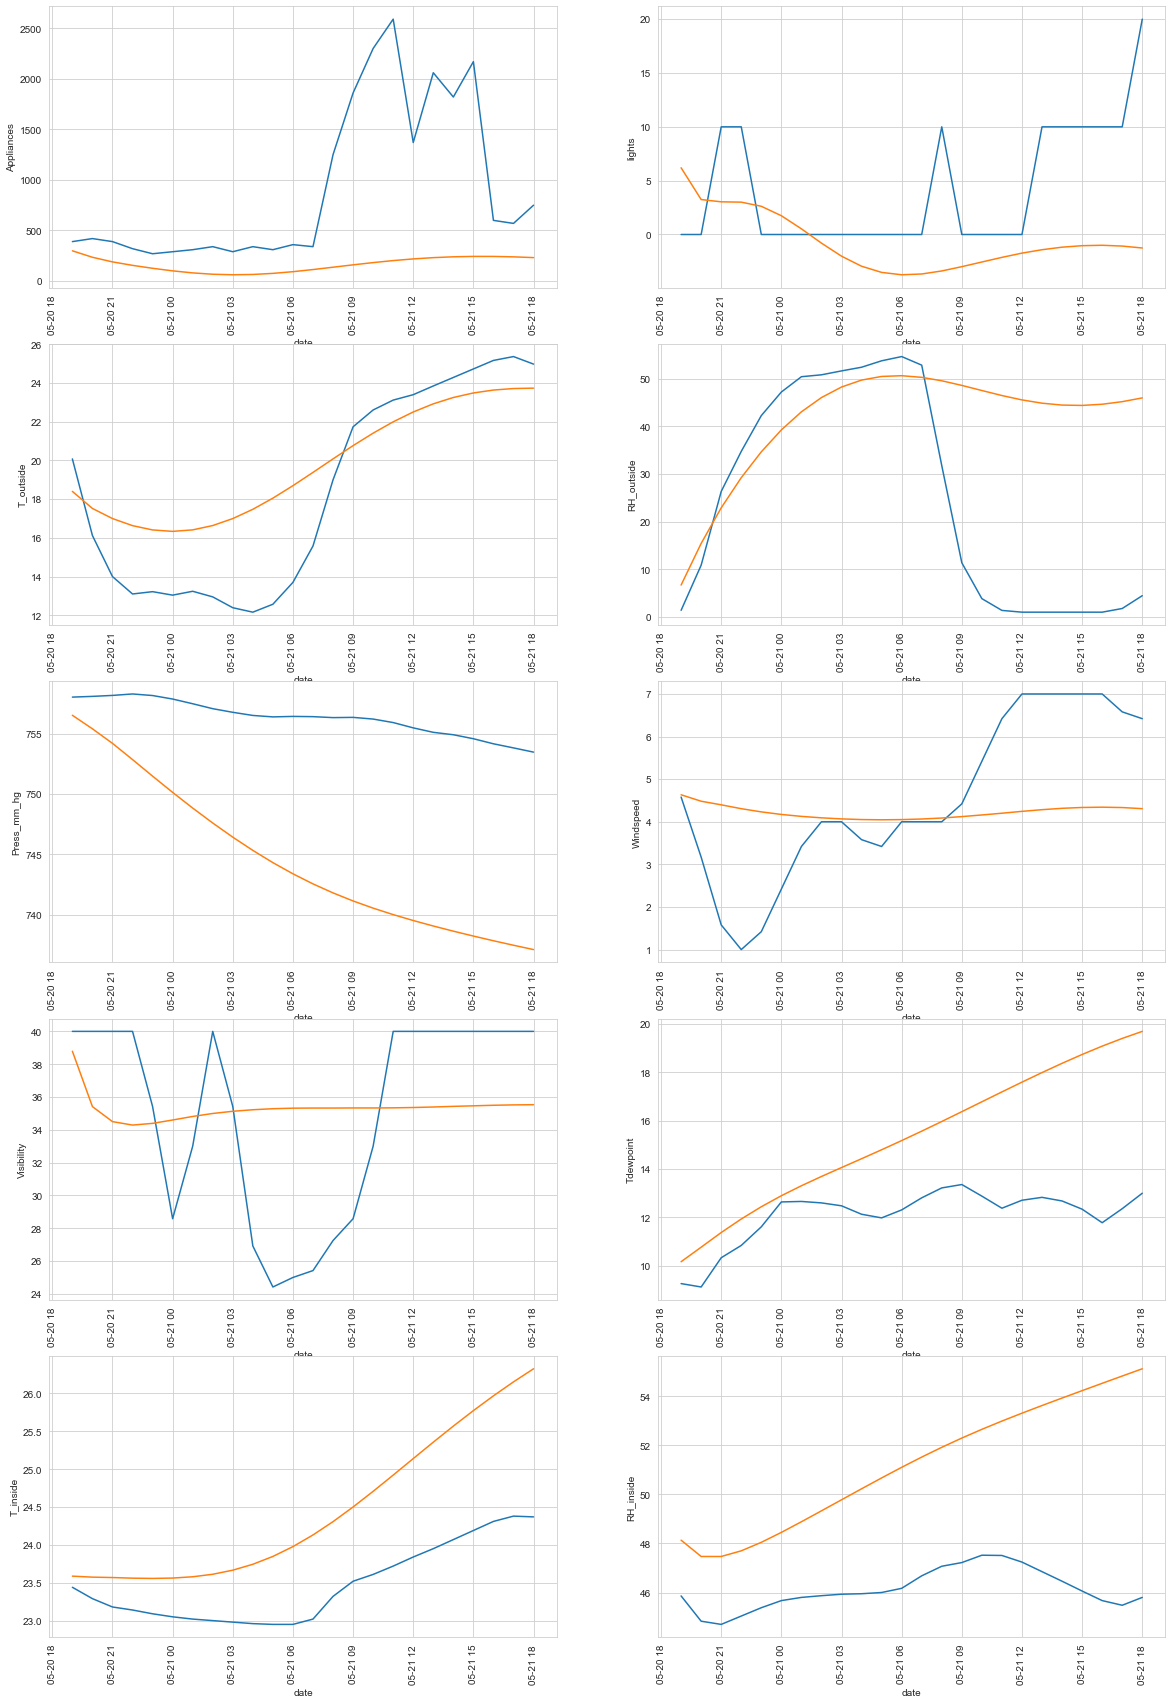

In [46]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i]) # tek sütunlu dataframe oluşturduk
    test_eva["predictions"] = predictions[i].values # tahminleri dataframe'e ekledik
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);

In [ ]:
# bir datasetinin indeksinde time olması datanın timeseries olması anlamına gelmez.
# çünkü bu dataseti için feature'ler sadece zamanla değil birbirleriyle de ilişkili 
# (mesela enerji tüketimi diğer feature'lar ile de ilişkili ama burada dikkate alınmıyor)
# bu sebeple TimeSeriesGenerator ile özellikle çoklu feature olduğunda sadece time'a göre yapılan değerlendirme
# doğru sonuç vermez ancak her feature için zamanla kuvvetli bir ilişki mevcutsa sonuç alınabilir

# Univariate Time Series for Appliances Feature

In [47]:
df_app = df[["Appliances"]]
df_app

,Appliances
date,
2016-01-11 17:00:00,330
2016-01-11 18:00:00,1060
2016-01-11 19:00:00,1040
2016-01-11 20:00:00,750
2016-01-11 21:00:00,620
...,...
2016-05-27 14:00:00,610
2016-05-27 15:00:00,460
2016-05-27 16:00:00,810


### Train Test Split

In [48]:
len(df_app)

3290

In [49]:
# How many rows per day?
24

24

In [50]:
test_days = 7

In [51]:
test_ind = test_days*24

In [52]:
test_ind

168

In [53]:
train = df_app.iloc[:-test_ind]
test = df_app.iloc[-test_ind:]

In [54]:
train.shape, test.shape

((3122, 1), (168, 1))

### Scale Data

In [55]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
scaler.fit(train)

MinMaxScaler()

In [58]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [59]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [60]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [61]:
n_features = train_scaled.shape[1]

In [62]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [63]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [64]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 36s 11ms/step - loss: 0.0133 - val_loss: 0.0135
Epoch 2/10
3098/3098 [==============================] - 33s 10ms/step - loss: 0.0124 - val_loss: 0.0147
Epoch 3/10
3098/3098 [==============================] - 33s 11ms/step - loss: 0.0122 - val_loss: 0.0124
Epoch 4/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0122 - val_loss: 0.0130
Epoch 5/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0120 - val_loss: 0.0154
Epoch 6/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0119 - val_loss: 0.0132


<AxesSubplot:>

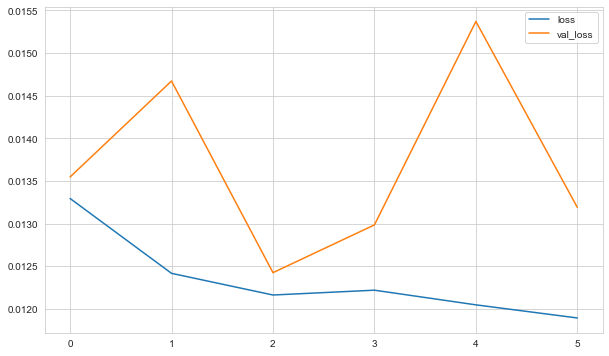

In [65]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [66]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [67]:
predictions_scaled

[array([0.10708143], dtype=float32),
 array([0.11253292], dtype=float32),
 array([0.11220177], dtype=float32),
 array([0.10842879], dtype=float32),
 array([0.10355069], dtype=float32),
 array([0.09910632], dtype=float32),
 array([0.09597301], dtype=float32),
 array([0.09431969], dtype=float32),
 array([0.09398026], dtype=float32),
 array([0.09427899], dtype=float32),
 array([0.09485614], dtype=float32),
 array([0.09524387], dtype=float32),
 array([0.09532098], dtype=float32),
 array([0.09509119], dtype=float32),
 array([0.09466768], dtype=float32),
 array([0.0946067], dtype=float32),
 array([0.09485037], dtype=float32),
 array([0.09549139], dtype=float32),
 array([0.09638283], dtype=float32),
 array([0.09733438], dtype=float32),
 array([0.09815593], dtype=float32),
 array([0.09871437], dtype=float32),
 array([0.09897569], dtype=float32),
 array([0.09894818], dtype=float32)]

In [68]:
test_scaled[:length]

array([[0.06321839],
       [0.07183908],
       [0.06321839],
       [0.04310345],
       [0.02873563],
       [0.03448276],
       [0.04022989],
       [0.04885057],
       [0.03448276],
       [0.04885057],
       [0.04022989],
       [0.0545977 ],
       [0.04885057],
       [0.31034483],
       [0.48563218],
       [0.61206897],
       [0.6954023 ],
       [0.34482759],
       [0.54310345],
       [0.47413793],
       [0.57471264],
       [0.12356322],
       [0.11494253],
       [0.16666667]])

In [69]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.2748244686191763 
mae: 0.16951536706566697 
mse: 0.0625618647981207 
rmse: 0.2501236989933595


## Inverse Transformations and Compare

In [70]:
predictions = scaler.inverse_transform(predictions_scaled)

In [71]:
compare = test[:length]

In [72]:
compare['Predictions'] = predictions

In [73]:
compare

,Appliances,Predictions
date,,
2016-05-20 19:00:00,390,542.643
2016-05-20 20:00:00,420,561.615
2016-05-20 21:00:00,390,560.462
2016-05-20 22:00:00,320,547.332
2016-05-20 23:00:00,270,530.356
2016-05-21 00:00:00,290,514.890
2016-05-21 01:00:00,310,503.986
2016-05-21 02:00:00,340,498.233
2016-05-21 03:00:00,290,497.051


<AxesSubplot:xlabel='date'>

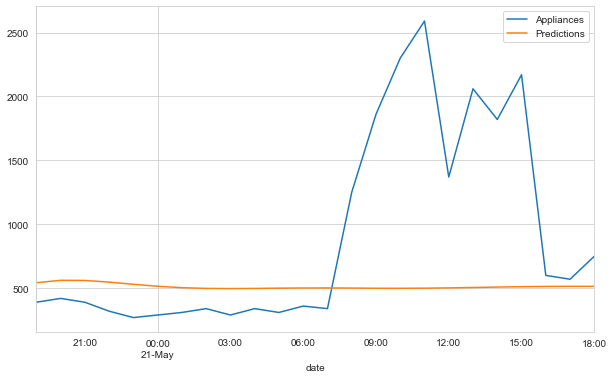

In [74]:
compare.plot()
# tek feature ile de iyi sonuç alamadık

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>